In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('/Users/samkhatri/Desktop/Data Science Projects/Clinical-Readmission-Prediction/Data/diabetic_data.csv')

In [5]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Data Cleaning 

In [8]:
df['encounter_id'].nunique()

101766

In [9]:
df_ids = pd.read_csv('/Users/samkhatri/Desktop/Data Science Projects/Clinical-Readmission-Prediction/Data/IDS_mapping.csv')

In [63]:
df_admission = df_ids[:8]
df_discharge_disposition = df_ids[9:41]
df_admission_source_id = df_ids[41:]


In [44]:
df_admission 

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


In [65]:
df_discharge_disposition.columns = df_discharge_disposition.loc[9]
df_discharge_disposition = df_discharge_disposition[1:40]
df_discharge_disposition = df_discharge_disposition.reset_index(drop=True)
df_discharge_disposition.columns.name = None
df_discharge_disposition.dropna(inplace=True)

In [187]:
df_discharge_disposition.to_csv('df_discharge_disposition.csv', index=False)

In [94]:
df_admission_source_id = df_ids[41:]
df_admission_source_id.columns = df_admission_source_id.loc[41]
df_admission_source_id = df_admission_source_id[1:]
df_admission_source_id = df_admission_source_id.reset_index(drop=True)
df_admission_source_id.columns.name = None


In [188]:
df_admission_source_id

,admission_source_id,description
0,1,Physician Referral
1,2,Clinic Referral
2,3,HMO Referral
3,4,Transfer from a hospital
4,5,Transfer from a Skilled Nursing Facility (SNF)
5,6,Transfer from another health care facility
6,7,Emergency Room
7,8,Court/Law Enforcement
8,9,Not Available
9,10,Transfer from critial access hospital


In [97]:
df.head().T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,?,?,?,?,?
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


In [99]:
df['max_glu_serum'].value_counts()

None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64

In [100]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [105]:
df['race'].value_counts()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [156]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'glimepiride', 'glipizide', 'glyburide',
       'pioglitazone', 'rosiglitazone', 'insulin', 'change', 'diabetesMed',
       'readmitted', 'insulin_prescribed', 'insulin_up', 'insulin_down',
       'insulin_steady'],
      dtype='object')

In [149]:
# Insulin being a major feature for diabtic pateints 

df['insulin_prescribed'] = (df['insulin'] != 'No').astype(int)
df['insulin_up']         = (df['insulin'] == 'Up').astype(int)
df['insulin_down']       = (df['insulin'] == 'Down').astype(int)
df['insulin_steady']     = (df['insulin'] == 'Steady').astype(int)

In [151]:
# Define all medication columns
med_columns = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 
               'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 
               'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
               'miglitol', 'troglitazone', 'tolazamide', 'examide', 
               'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 
               'glimepiride-pioglitazone', 'metformin-rosiglitazone', 
               'metformin-pioglitazone']

In [ ]:
df.drop(columns=[
    'glimepiride-pioglitazone',
    'metformin-rosiglitazone',
    'metformin-pioglitazone'
], inplace=True)


In [155]:
cols_to_drop = [
    'nateglinide',
    'chlorpropamide',
    'acetohexamide',
    'tolbutamide',
    'acarbose',
    'miglitol',
    'troglitazone',
    'tolazamide',
    'examide',
    'citoglipton',
    'glyburide-metformin',
    'glipizide-metformin',
    'glimepiride-pioglitazone',
    'metformin-rosiglitazone',
    'metformin-pioglitazone'
]

df.drop(columns=cols_to_drop, inplace=True)

In [157]:
df['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [158]:
# Create readmitted_binary: 1 if readmitted within 30 days, else 0
df['readmitted_binary'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)


In [159]:
meds = ['metformin','repaglinide','glimepiride','glipizide',
        'glyburide','pioglitazone','rosiglitazone']

rates = {}
for m in meds:
    # flag prescription
    df[f'{m}_prescribed'] = (df[m] != 'No').astype(int)
    # compute mean readmit rate when prescribed vs. not
    grp = df.groupby(f'{m}_prescribed')['readmitted_binary'].mean()
    # record difference (rate_if_prescribed – rate_if_not)
    rates[m] = grp[1] - grp[0]

# Sort by absolute effect size
import pandas as pd
critical = pd.Series(rates).abs().sort_values(ascending=False)
print(critical)


repaglinide      0.021936
metformin        0.018157
glimepiride      0.010010
rosiglitazone    0.007597
pioglitazone     0.006441
glyburide        0.005929
glipizide        0.003265
dtype: float64


# Feature Engineering 

In [160]:
oral_meds = [
    'metformin', 'repaglinide', 'glimepiride',
    'glipizide', 'glyburide', 'pioglitazone',
    'rosiglitazone'
]

# 1. Total oral meds prescribed (anything ≠ “No”)
df['num_oral_meds_prescribed'] = df[oral_meds].apply(lambda row: (row != 'No').sum(), axis=1)

# 2. How many oral meds went Up
df['num_oral_meds_up'] = df[oral_meds].apply(lambda row: (row == 'Up').sum(), axis=1)

# 3. How many oral meds went Down
df['num_oral_meds_down'] = df[oral_meds].apply(lambda row: (row == 'Down').sum(), axis=1)

# 4. Any oral‐med change?
df['oral_med_changed'] = ((df['num_oral_meds_up'] + df['num_oral_meds_down']) > 0).astype(int)

# 5. Ratio of changed oral meds to total prescribed
df['oral_med_change_ratio'] = 0.0
mask = df['num_oral_meds_prescribed'] > 0
df.loc[mask, 'oral_med_change_ratio'] = (
    df.loc[mask, 'num_oral_meds_up'] +
    df.loc[mask, 'num_oral_meds_down']
) / df.loc[mask, 'num_oral_meds_prescribed']



In [164]:
df.drop(columns=[
    'metformin', 'repaglinide', 'glimepiride',
    'glipizide', 'glyburide', 'pioglitazone',
    'rosiglitazone', 'insulin'
], inplace=True)


In [167]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'change', 'diabetesMed', 'readmitted', 'insulin_prescribed',
       'insulin_up', 'insulin_down', 'insulin_steady', 'readmitted_binary',
       'metformin_prescribed', 'repaglinide_prescribed',
       'glimepiride_prescribed', 'glipizide_prescribed',
       'glyburide_prescribed', 'pioglitazone_prescribed',
       'rosiglitazone_prescribed', 'num_oral_meds_prescribed',
       'num_oral_meds_up', 'num_oral_meds_down', 'oral_med_changed',
       'oral_med_change_ratio'],
      dtype='object')

In [170]:
# Redudnat since we made num_oral_meds_prescribed, oral_med_changed
df.drop(columns=['change', 'diabetesMed'], inplace=True)
df.drop(columns=[
    'metformin_prescribed',
    'repaglinide_prescribed',
    'glimepiride_prescribed',
    'glipizide_prescribed',
    'glyburide_prescribed',
    'pioglitazone_prescribed',
    'rosiglitazone_prescribed'
], inplace=True)


In [178]:
glu_map = {'None': 0, 'Norm': 1, '>200': 2, '>300': 3}
a1c_map = {'None': 0, 'Norm': 1, '>7': 2, '>8': 3}

df['max_glu_serum_ord'] = df['max_glu_serum'].map(glu_map)
df['A1Cresult_ord']     = df['A1Cresult'].map(a1c_map)



In [182]:
df['admission_type_id'].value_counts()

1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64

In [183]:
df['discharge_disposition_id'].value_counts()

1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

In [184]:
df['admission_source_id'].value_counts()

7     57494
1     29565
17     6781
4      3187
6      2264
2      1104
5       855
3       187
20      161
9       125
8        16
22       12
10        8
14        2
11        2
25        2
13        1
Name: admission_source_id, dtype: int64

In [189]:
keep_adm = [1,2,3]
df['admission_type_grp'] = df['admission_type_id'] \
    .where(df['admission_type_id'].isin(keep_adm), other='Other') \
    .map({
        1: 'Emergency', 2: 'Urgent', 3: 'Elective', 'Other': 'Other'
    })


keep_src = [7,1,17,4,6,2]
src_map = {
    7:'ER', 1:'PhysicianReferral', 17:'Unknown', 
    4:'HospitalTransfer', 6:'FacilityTransfer', 2:'ClinicReferral'
}
df['admission_source_grp'] = df['admission_source_id'] \
    .where(df['admission_source_id'].isin(keep_src), other='Other') \
    .map(lambda x: src_map.get(x, 'Other'))


keep_disp = [1,3,6,18,2,22,11,5]
disp_map = {
    1:'Home', 3:'SNF', 6:'HomeHealth', 18:'HospiceHome',
    2:'OtherHospital', 22:'HospiceFacility', 11:'RehabFacility', 5:'OtherCare'
}
df['discharge_disp_grp'] = df['discharge_disposition_id'] \
    .where(df['discharge_disposition_id'].isin(keep_disp), other='Other') \
    .map(lambda x: disp_map.get(x, 'Other'))


In [191]:
import pandas as pd

df = pd.get_dummies(
    df,
    columns=['admission_type_grp','admission_source_grp','discharge_disp_grp'],
    prefix=['admType','admSrc','disp'],
    drop_first=False    # set True if you want to avoid multicollinearity in a linear model
)


In [196]:
df['diag_3'].value_counts()

250     11555
401      8289
276      5175
428      4577
427      3955
        ...  
657         1
684         1
603         1
E826        1
971         1
Name: diag_3, Length: 790, dtype: int64

In [197]:
# assume df['readmitted_binary'] already exists
import pandas as pd

# 1. group‐by primary diag and compute readmit rates
rates = df.groupby('diag_1')['readmitted_binary'].mean()
base = df['readmitted_binary'].mean()
# 2. compute lift: code_rate – overall_rate
lift = (rates - base).abs().sort_values(ascending=False)

# 3. take the top N codes by lift
topN = lift.head(10).index.tolist()
print("Top 10 primary diagnoses by readmit lift:", topN)


Top 10 primary diagnoses by readmit lift: ['904', '299', '391', '543', '271', 'V60', '347', '906', '974', '731']


In [198]:
# 1. Define your top‐10 list
top10 = ['904','299','391','543','271','V60','347','906','974','731']

# 2. Group primary diagnosis into “Top” vs “Other”
df['diag1_grp'] = df['diag_1'].where(df['diag_1'].isin(top10), other='Other')

# 3. One‐hot encode the grouped feature
df = pd.get_dummies(
    df,
    columns=['diag1_grp'],
    prefix='diag1',
    drop_first=False  # keep 'diag1_Other' if you want to model the baseline
)


In [205]:
def age_group(bin_label):
    # bin_label is like "[70-80)"
    num = int(bin_label.strip('[]()').split('-')[0])
    if num < 25:
        return 'under25'
    elif num < 50:
        return '25to49'
    elif num < 75:
        return '50to74'
    else:
        return '75plus'

# Apply to your age column
df['age_grp'] = df['age'].apply(age_group)

# One-hot encode the new 4 groups
df = pd.get_dummies(df, columns=['age_grp'], prefix='age', drop_first=False)


In [206]:
df['race_grp'] = df['race'].replace('?', 'Unknown') \
                     .where(df['race'].isin(['Caucasian','AfricanAmerican','Hispanic']),
                            other='Other')
df = pd.get_dummies(df, columns=['race_grp'], prefix='race')


In [207]:
df['gender_bin'] = df['gender'].map({'Male':0,'Female':1}).fillna(2).astype(int)
# Or one-hot: pd.get_dummies(df, columns=['gender'], prefix='gender')


In [217]:
df['readmitted_binary'].value_counts()

0    90409
1    11357
Name: readmitted_binary, dtype: int64

In [210]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'readmitted', 'insulin_prescribed', 'insulin_up', 'insulin_down',
       'insulin_steady', 'readmitted_binary', 'num_oral_meds_prescribed',
       'num_oral_meds_up', 'num_oral_meds_down', 'oral_med_changed',
       'oral_med_change_ratio', 'max_glu_serum_ord', 'A1Cresult_ord',
       'admType_Elective', 'admType_Emergency', 'admType_Other',
       'admType_Urgent', 'admSrc_ClinicReferral', 'admSrc_ER',
       'admSrc_FacilityTransfer', 'admSrc_HospitalTransfer', 'admSrc_Other',
       'admSrc_PhysicianReferral', 'admSrc_Unknown', 'disp_Home',
       '

In [229]:
df['medical_specialty'].value_counts()

?                                49949
InternalMedicine                 14635
Emergency/Trauma                  7565
Family/GeneralPractice            7440
Cardiology                        5352
                                 ...  
SportsMedicine                       1
Speech                               1
Perinatology                         1
Neurophysiology                      1
Pediatrics-InfectiousDiseases        1
Name: medical_specialty, Length: 73, dtype: int64

In [211]:
num_feats = [
    'time_in_hospital',
    'num_lab_procedures',
    'num_procedures',
    'num_medications',
    'number_outpatient',
    'number_emergency',
    'number_inpatient',
    'number_diagnoses',
    'insulin_prescribed',
    'insulin_up',
    'insulin_down',
    'num_oral_meds_prescribed',
    'num_oral_meds_up',
    'num_oral_meds_down',
    'oral_med_changed',
    'oral_med_change_ratio',
    'max_glu_serum_ord',
    'A1Cresult_ord'
]

adm_type_feats   = [c for c in df.columns if c.startswith('admType_')]
adm_src_feats    = [c for c in df.columns if c.startswith('admSrc_')]
disp_feats       = [c for c in df.columns if c.startswith('disp_')]
diag1_feats      = [c for c in df.columns if c.startswith('diag1_')]
age_feats        = [c for c in df.columns if c.startswith('age_')]
race_feats       = [c for c in df.columns if c.startswith('race_')]

gender_feat = ['gender_bin']

feature_cols = (
    num_feats
  + adm_type_feats
  + adm_src_feats
  + disp_feats
  + diag1_feats
  + age_feats
  + race_feats
  + gender_feat
)

# Build X and y
X = df[feature_cols]
y = df['readmitted_binary']


In [230]:
import pandas as pd

# 1. Map “?” to a real category
df['payer_code'] = df['payer_code'].replace('?', 'Unknown')
df['medical_specialty'] = df['medical_specialty'].replace('?', 'Unknown')

# 2. Collapse any category under 1% frequency into “Other”
def collapse_rare(series, min_pct=0.01, other_label='Other'):
    freqs = series.value_counts(normalize=True)
    keep = freqs[freqs >= min_pct].index
    return series.where(series.isin(keep), other_label)

df['payer_grp']   = collapse_rare(df['payer_code'],   min_pct=0.01)
df['medspec_grp'] = collapse_rare(df['medical_specialty'], min_pct=0.01)

# 3. One-hot encode the grouped columns
df = pd.get_dummies(
    df,
    columns=['payer_grp','medspec_grp'],
    prefix=['payer','medspec'],
    drop_first=False
)

# 4. Add the new dummies to your feature list
payer_feats   = [c for c in df.columns if c.startswith('payer_')]
medspec_feats = [c for c in df.columns if c.startswith('medspec_')]
feature_cols += payer_feats + medspec_feats

# 5. Rebuild X and y, re-split and retrain as before
X = df[feature_cols]
y = df['readmitted_binary']


In [231]:
X.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'insulin_prescribed',
       'insulin_up', 'insulin_down', 'num_oral_meds_prescribed',
       'num_oral_meds_up', 'num_oral_meds_down', 'oral_med_changed',
       'oral_med_change_ratio', 'max_glu_serum_ord', 'A1Cresult_ord',
       'admType_Elective', 'admType_Emergency', 'admType_Other',
       'admType_Urgent', 'admSrc_ClinicReferral', 'admSrc_ER',
       'admSrc_FacilityTransfer', 'admSrc_HospitalTransfer', 'admSrc_Other',
       'admSrc_PhysicianReferral', 'admSrc_Unknown', 'disp_Home',
       'disp_HomeHealth', 'disp_HospiceFacility', 'disp_HospiceHome',
       'disp_Other', 'disp_OtherCare', 'disp_OtherHospital',
       'disp_RehabFacility', 'disp_SNF', 'diag1_271', 'diag1_299', 'diag1_347',
       'diag1_391', 'diag1_543', 'diag1_731', 'diag1_904', 'diag1_906',
       'diag1_974', 'diag1_Other', 'dia

In [216]:
y

0         0
1         0
2         0
3         0
4         0
         ..
101761    0
101762    0
101763    0
101764    0
101765    0
Name: readmitted_binary, Length: 101766, dtype: int64

# Baseline- Evaluation 

In [219]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

# 1. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    stratify=y,
    test_size=0.2,
    random_state=42
)

# ─── Logistic Regression ─────────────────────────────────────────────────────
pipe_lr = make_pipeline(
    StandardScaler(),
    LogisticRegression(
        penalty='l2',
        solver='saga',
        class_weight='balanced',
        max_iter=1000,
        random_state=42
    )
)

# 2a. CV AUC
cv_auc = cross_val_score(pipe_lr, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Logistic Regression CV AUC: {cv_auc.mean():.3f}")

# 2b. Fit & test AUC
pipe_lr.fit(X_train, y_train)
y_pred_proba_lr = pipe_lr.predict_proba(X_test)[:,1]
print(f"Logistic Regression Test AUC: {roc_auc_score(y_test, y_pred_proba_lr):.3f}")

# Optional: confusion matrix & classification report
y_pred_lr = pipe_lr.predict(X_test)
print("LR Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("LR Classification Report:\n", classification_report(y_test, y_pred_lr))

# ─── Random Forest ────────────────────────────────────────────────────────────
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    min_samples_leaf=50,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# 3a. (Optional) CV AUC for RF
cv_auc_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Random Forest CV AUC: {cv_auc_rf.mean():.3f}")

# 3b. Fit & test AUC
rf.fit(X_train, y_train)
y_pred_proba_rf = rf.predict_proba(X_test)[:,1]
print(f"Random Forest Test AUC: {roc_auc_score(y_test, y_pred_proba_rf):.3f}")

# 4. Feature importances
fi = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top 10 RF features:\n", fi.head(10))


/Users/samkhatri/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/samkhatri/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/samkhatri/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/samkhatri/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/samkhatri/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression CV AUC: 0.661
Logistic Regression Test AUC: 0.671
LR Confusion Matrix:
 [[12490  5593]
 [ 1021  1250]]
LR Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.69      0.79     18083
           1       0.18      0.55      0.27      2271

    accuracy                           0.68     20354
   macro avg       0.55      0.62      0.53     20354
weighted avg       0.84      0.68      0.73     20354



/Users/samkhatri/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Random Forest CV AUC: 0.666
Random Forest Test AUC: 0.675
Top 10 RF features:
 number_inpatient        0.338415
disp_Home               0.094992
disp_RehabFacility      0.086274
disp_HospiceFacility    0.067349
number_emergency        0.062167
number_diagnoses        0.048970
time_in_hospital        0.041815
num_medications         0.039061
num_lab_procedures      0.028418
disp_SNF                0.021520
dtype: float64


In [220]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# 1. Prepare data
X_values = X.values.astype(np.float32)
y_values = y.values.astype(np.float32)

# train/test split
X_tr, X_te, y_tr, y_te = train_test_split(
    X_values, y_values,
    stratify=y_values,
    test_size=0.2,
    random_state=42
)

# scale inputs
scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_te = scaler.transform(X_te)

# 2. Compute class weights
# gives weight ~ (n_samples/(n_classes*count))
counts = np.bincount(y_tr.astype(int))
total = len(y_tr)
class_weight = {
    0: total / (2 * counts[0]),
    1: total / (2 * counts[1])
}

# 3. Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_tr.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(name='auc')]
)

# 4. Train
history = model.fit(
    X_tr, y_tr,
    validation_split=0.1,
    epochs=30,
    batch_size=256,
    class_weight=class_weight,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_auc',
            patience=5,
            mode='max',
            restore_best_weights=True
        )
    ],
    verbose=2
)

# 5. Evaluate on test set
results = model.evaluate(X_te, y_te, verbose=0)
print(f"Neural Net Test AUC: {results[1]:.3f}")

# 6. Predict & compute custom AUC if you want
y_pred = model.predict(X_te).ravel()
print("Test ROC AUC (sklearn):", roc_auc_score(y_te, y_pred).round(3))


Epoch 1/30
287/287 - 1s - loss: 0.6851 - auc: 0.5958 - val_loss: 0.6739 - val_auc: 0.6541 - 601ms/epoch - 2ms/step
Epoch 2/30
287/287 - 0s - loss: 0.6618 - auc: 0.6402 - val_loss: 0.6468 - val_auc: 0.6639 - 213ms/epoch - 741us/step
Epoch 3/30
287/287 - 0s - loss: 0.6553 - auc: 0.6516 - val_loss: 0.6690 - val_auc: 0.6679 - 196ms/epoch - 683us/step
Epoch 4/30
287/287 - 0s - loss: 0.6518 - auc: 0.6574 - val_loss: 0.6486 - val_auc: 0.6685 - 196ms/epoch - 682us/step
Epoch 5/30
287/287 - 0s - loss: 0.6499 - auc: 0.6623 - val_loss: 0.6293 - val_auc: 0.6697 - 195ms/epoch - 678us/step
Epoch 6/30
287/287 - 0s - loss: 0.6475 - auc: 0.6660 - val_loss: 0.6232 - val_auc: 0.6717 - 188ms/epoch - 656us/step
Epoch 7/30
287/287 - 0s - loss: 0.6470 - auc: 0.6659 - val_loss: 0.6471 - val_auc: 0.6712 - 194ms/epoch - 677us/step
Epoch 8/30
287/287 - 0s - loss: 0.6454 - auc: 0.6698 - val_loss: 0.6651 - val_auc: 0.6743 - 189ms/epoch - 657us/step
Epoch 9/30
287/287 - 0s - loss: 0.6466 - auc: 0.6668 - val_loss: 0

In [221]:
y_pred_nn = (model.predict(X_te).ravel() >= 0.5).astype(int)
print(classification_report(y_te, y_pred_nn, digits=3))


637/637 [==============================] - 0s 256us/step
              precision    recall  f1-score   support

         0.0      0.936     0.585     0.720     18083
         1.0      0.171     0.682     0.273      2271

    accuracy                          0.596     20354
   macro avg      0.553     0.633     0.497     20354
weighted avg      0.851     0.596     0.670     20354



In [227]:
import numpy as np
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

X_tr, X_test, y_tr, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
X_min = X_tr[y_tr==1]
y_min = y_tr[y_tr==1]
X_maj = X_tr[y_tr==0]
y_maj = y_tr[y_tr==0]

n_chunks = 7
aucs = []
models = []

for i in range(n_chunks):
    X_maj_sample, y_maj_sample = resample(
        X_maj, y_maj,
        replace=False,
        n_samples=len(y_min),
        random_state=42 + i
    )

    X_bal = np.vstack([X_min, X_maj_sample])
    y_bal = np.concatenate([y_min, y_maj_sample])

    # 4. Train a model
    rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42 + i)
    rf.fit(X_bal, y_bal)
    models.append(rf)

    # 5. Evaluate on held‐out test set
    yp = rf.predict_proba(X_test)[:,1]
    aucs.append(roc_auc_score(y_test, yp))

print("Chunk AUCs:", np.round(aucs,3))
print("Mean AUC:", np.round(np.mean(aucs),3))


/Users/samkhatri/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/samkhatri/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/samkhatri/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/samkhatri/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/samkhatri/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.w

Chunk AUCs: [0.675 0.674 0.676 0.674 0.672 0.673 0.674]
Mean AUC: 0.674


/Users/samkhatri/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [222]:
df['readmitted_binary'].value_counts()

0    90409
1    11357
Name: readmitted_binary, dtype: int64

In [243]:
X.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'insulin_prescribed',
       'insulin_up', 'insulin_down', 'num_oral_meds_prescribed',
       'num_oral_meds_up', 'num_oral_meds_down', 'oral_med_changed',
       'oral_med_change_ratio', 'max_glu_serum_ord', 'A1Cresult_ord',
       'admType_Elective', 'admType_Emergency', 'admType_Other',
       'admType_Urgent', 'admSrc_ClinicReferral', 'admSrc_ER',
       'admSrc_FacilityTransfer', 'admSrc_HospitalTransfer', 'admSrc_Other',
       'admSrc_PhysicianReferral', 'admSrc_Unknown', 'disp_Home',
       'disp_HomeHealth', 'disp_HospiceFacility', 'disp_HospiceHome',
       'disp_Other', 'disp_OtherCare', 'disp_OtherHospital',
       'disp_RehabFacility', 'disp_SNF', 'diag1_271', 'diag1_299', 'diag1_347',
       'diag1_391', 'diag1_543', 'diag1_731', 'diag1_904', 'diag1_906',
       'diag1_974', 'diag1_Other', 'dia

In [244]:
# 1. Age + Insulin risk
df['age_insulin_risk'] = df['age_75plus'] * df['insulin_prescribed']

# 2. Instability indicator
df['unstable_patient'] = (
    (df['number_inpatient'] > 0) &
    (df['oral_med_changed'] == 1)
).astype(int)

# 3. Emergency + med change
df['emergency_med_change'] = df['admType_Emergency'] * df['oral_med_changed']

# 4. Complexity indicator
median_stay       = df['time_in_hospital'].median()
median_procedures = df['num_procedures'].median()
df['complex_stay'] = (
    (df['time_in_hospital'] > median_stay) &
    (df['num_procedures']  > median_procedures)
).astype(int)


In [245]:
feature_cols += [
    'age_insulin_risk',
    'unstable_patient',
    'emergency_med_change',
    'complex_stay'
]


In [253]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd

# 1. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    df[feature_cols], df['readmitted_binary'],
    stratify=df['readmitted_binary'],
    test_size=0.2,
    random_state=42
)

# 2. Fit RF
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# 3. Evaluate
print("RF Test AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]).round(3))

# 4. Get importances
importances = pd.Series(rf.feature_importances_, index=feature_cols)
importances = importances.sort_values(ascending=False)

# 5. Show top 15
print("Top 15 features by importance:")
print(importances.head(15))


RF Test AUC: 0.68
Top 15 features by importance:
number_inpatient            0.254271
disp_Home                   0.062260
disp_RehabFacility          0.060452
number_emergency            0.048670
num_medications             0.046679
disp_HospiceFacility        0.045244
num_lab_procedures          0.044435
number_diagnoses            0.043174
time_in_hospital            0.042826
num_procedures              0.019216
number_outpatient           0.018643
disp_SNF                    0.016461
num_oral_meds_prescribed    0.015510
insulin_prescribed          0.012294
A1Cresult_ord               0.011832
dtype: float64


In [254]:
# threshold for dropping
thresh = 0.005
low_imp = importances[importances < thresh].index.tolist()
# drop from your feature matrix and retrain
X_reduced = X_train.drop(columns=low_imp)


In [255]:
X_reduced.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'insulin_prescribed',
       'insulin_up', 'insulin_down', 'num_oral_meds_prescribed',
       'max_glu_serum_ord', 'A1Cresult_ord', 'admType_Elective',
       'admType_Emergency', 'admType_Urgent', 'admSrc_ER',
       'admSrc_PhysicianReferral', 'disp_Home', 'disp_HomeHealth',
       'disp_HospiceFacility', 'disp_OtherCare', 'disp_OtherHospital',
       'disp_RehabFacility', 'disp_SNF', 'age_50to74', 'age_75plus',
       'race_AfricanAmerican', 'race_Caucasian', 'gender_bin', 'payer_MC',
       'payer_Unknown', 'medspec_Cardiology', 'medspec_Unknown',
       'age_insulin_risk', 'complex_stay'],
      dtype='object')

In [256]:
import pandas as pd

# Function to map ICD-9 codes to high-level chapters (comorbidity proxy)
def icd9_chapter(code):
    if pd.isna(code) or code == '?':
        return None
    code_str = str(code)
    if code_str.startswith('E'):
        return 'External'
    if code_str.startswith('V'):
        return 'Supplementary'
    try:
        num = float(code_str)
    except ValueError:
        return None
    if   1 <= num <= 139:  return 'Infectious'
    elif 140 <= num <= 239: return 'Neoplasm'
    elif 240 <= num <= 279: return 'Endocrine'
    elif 280 <= num <= 289: return 'Blood'
    elif 290 <= num <= 319: return 'Mental'
    elif 320 <= num <= 389: return 'NervousSystem'
    elif 390 <= num <= 459: return 'Circulatory'
    elif 460 <= num <= 519: return 'Respiratory'
    elif 520 <= num <= 579: return 'Digestive'
    elif 580 <= num <= 629: return 'Genitourinary'
    elif 630 <= num <= 679: return 'Pregnancy'
    elif 680 <= num <= 709: return 'Skin'
    elif 710 <= num <= 739: return 'Musculoskeletal'
    elif 740 <= num <= 759: return 'Congenital'
    elif 760 <= num <= 779: return 'Perinatal'
    elif 780 <= num <= 799: return 'Symptoms'
    elif 800 <= num <= 999: return 'Injury'
    else: return None

# Compute a simple comorbidity score: count of distinct chapters across diag_1, diag_2, diag_3
df['comorbidity_score'] = df[['diag_1', 'diag_2', 'diag_3']].apply(
    lambda row: len({icd9_chapter(c) for c in row if icd9_chapter(c) is not None}), axis=1
)

# Display the new feature distribution
import numpy as np
score_counts = df['comorbidity_score'].value_counts().sort_index()
print("Comorbidity Score Distribution:\n", score_counts)


Comorbidity Score Distribution:
 0        1
1     9787
2    44476
3    47502
Name: comorbidity_score, dtype: int64


In [262]:
# 1a. Compute total admissions per patient
df['total_admissions'] = df.groupby('patient_nbr')['encounter_id'] \
                           .transform('count')

# 1b. Create “prior_admissions” (exclude the current stay)
df['prior_admissions'] = df['total_admissions'] - 1

# 1c. Add to your feature list
feature_cols.append('prior_admissions')


In [263]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# 1. Ensure comorbidity_score is in df (you’ve already computed it)
#    df['comorbidity_score'] = ...

# 2. Get your reduced features from before
reduced_feats = [
    'time_in_hospital','num_lab_procedures','num_procedures','num_medications',
    'number_outpatient','number_emergency','number_inpatient','number_diagnoses',
    'insulin_prescribed','insulin_up','insulin_down','num_oral_meds_prescribed',
    'max_glu_serum_ord','A1Cresult_ord','admType_Elective','admType_Emergency',
    'admType_Urgent','admSrc_ER','admSrc_PhysicianReferral','disp_Home',
    'disp_HomeHealth','disp_HospiceFacility','disp_OtherCare','disp_OtherHospital',
    'disp_RehabFacility','disp_SNF','age_50to74','age_75plus',
    'race_AfricanAmerican','race_Caucasian','gender_bin','payer_MC',
    'payer_Unknown','medspec_Cardiology','medspec_Unknown','age_insulin_risk',
    'complex_stay'
]

# 3. Build X and y
feature_cols = reduced_feats + ['charlson_index']
X = df[feature_cols]
y = df['readmitted_binary']

# 4. Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    stratify=y,
    test_size=0.2,
    random_state=42
)

# 5. Train RF
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# 6. Evaluate
y_pred_prob = rf.predict_proba(X_test)[:,1]
print("RF Test AUC with comorbidity_score: ", roc_auc_score(y_test, y_pred_prob).round(3))

# 7. Feature importances
importances = pd.Series(rf.feature_importances_, index=feature_cols).sort_values(ascending=False)
print("Top 10 features by importance:\n", importances.head(10))


RF Test AUC with comorbidity_score:  0.679
Top 10 features by importance:
 number_inpatient        0.258245
disp_Home               0.063661
disp_RehabFacility      0.060220
num_lab_procedures      0.059569
num_medications         0.057546
time_in_hospital        0.047705
number_emergency        0.047466
disp_HospiceFacility    0.044619
number_diagnoses        0.042557
charlson_index          0.033352
dtype: float64


In [264]:
feature_cols

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'insulin_prescribed',
 'insulin_up',
 'insulin_down',
 'num_oral_meds_prescribed',
 'max_glu_serum_ord',
 'A1Cresult_ord',
 'admType_Elective',
 'admType_Emergency',
 'admType_Urgent',
 'admSrc_ER',
 'admSrc_PhysicianReferral',
 'disp_Home',
 'disp_HomeHealth',
 'disp_HospiceFacility',
 'disp_OtherCare',
 'disp_OtherHospital',
 'disp_RehabFacility',
 'disp_SNF',
 'age_50to74',
 'age_75plus',
 'race_AfricanAmerican',
 'race_Caucasian',
 'gender_bin',
 'payer_MC',
 'payer_Unknown',
 'medspec_Cardiology',
 'medspec_Unknown',
 'age_insulin_risk',
 'complex_stay',
 'charlson_index']

In [258]:
feature_cols = [f for f in feature_cols if f != 'comorbidity_score']


In [260]:
# Charlson Comorbidity Index ICD-9 weights as strings
charlson_map = {}

# Helper to bulk‐insert
def add_codes(codes, weight):
    for c in codes:
        charlson_map[c] = weight

# Myocardial infarction (1)
add_codes(['410', '412'], 1)

# Congestive heart failure (1)
add_codes([
    '39891','40201','40211','40291','40401','40403','40411','40413',
    '40491','40493','428'
], 1)

# Peripheral vascular disease (1)
add_codes([
    '0930','4373','440','441','442','4431','4432','4438','4439',
    '4471','5571','5579','V434'
], 1)

# Cerebrovascular disease (1)
add_codes(['430','431','432','433','434','435','436','4373'], 1)

# Dementia (1)
add_codes(['290'], 1)

# Chronic pulmonary disease (1)
add_codes([
    '4168','4169','490','491','492','493','494','495','496',
    '500','501','502','503','504','505'
], 1)

# Rheumatologic disease (1)
add_codes([
    '4465','7100','7101','7104','7109','7140','7141','7142',
    '7148','725'
], 1)

# Peptic ulcer disease (1)
add_codes(['531','532','533','534'], 1)

# Mild liver disease (1)
add_codes(['5712','5714','5715','5716'], 1)

# Diabetes without complications (1)
add_codes([f'250{str(i).zfill(2)}' for i in range(0,100)], 1)  # 25000–25099

# Hemiplegia or paraplegia (2)
add_codes(['342','343','344'], 2)

# Renal disease (2)
add_codes([
    '40301','40311','40391','40402','40403','40412','40413',
    '40492','40493','585','586','5888','5889'
], 2)

# Any malignancy (2)
add_codes([str(i) for i in range(140,209)], 2)  # 140–208

# Moderate or severe liver disease (3)
add_codes(['5722','5723','5724','5728'], 3)

# Metastatic solid tumor (6)
add_codes(['196','197','198','199'], 6)

# AIDS/HIV (6)
add_codes(['042','043','044'], 6)

# Function to compute Charlson index per row
def charlson_score(codes):
    total = 0
    for code in codes:
        s = str(code)
        # Try matching first 3 or 4 characters
        for length in (4,3):
            key = s[:length]
            if key in charlson_map:
                total += charlson_map[key]
                break
    return total

# Apply to your DataFrame (assuming diag_1…diag_3 exist)
df['charlson_index'] = df[['diag_1','diag_2','diag_3']].apply(
    lambda row: charlson_score(row), axis=1
)


In [265]:
# Count how many times each patient appears in the data
df['total_admissions'] = df.groupby('patient_nbr')['encounter_id'].transform('count')

# Subtract one so we don’t count the current stay
df['prior_admissions'] = df['total_admissions'] - 1


In [266]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

# 1. Split into train/test
X = df[[
    'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses', 'insulin_prescribed',
    'insulin_up', 'insulin_down', 'num_oral_meds_prescribed',
    'max_glu_serum_ord', 'A1Cresult_ord', 'admType_Elective',
    'admType_Emergency', 'admType_Urgent', 'admSrc_ER',
    'admSrc_PhysicianReferral', 'disp_Home', 'disp_HomeHealth',
    'disp_HospiceFacility', 'disp_OtherCare', 'disp_OtherHospital',
    'disp_RehabFacility', 'disp_SNF', 'age_50to74', 'age_75plus',
    'race_AfricanAmerican', 'race_Caucasian', 'gender_bin',
    'payer_MC', 'payer_Unknown', 'medspec_Cardiology',
    'medspec_Unknown', 'age_insulin_risk', 'complex_stay',
    'charlson_index', 'prior_admissions'  # if you added it
]].values.astype(np.float32)

y = df['readmitted_binary'].values.astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    stratify=y,
    test_size=0.2,
    random_state=42
)

# 2. Scale inputs
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# 3. Compute class weights
counts = np.bincount(y_train.astype(int))
total = len(y_train)
class_weight = {
    0: total / (2 * counts[0]),
    1: total / (2 * counts[1])
}

# 4. Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(1e-3),
    loss='binary_crossentropy'
)

# 5. Train
model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=256,
    class_weight=class_weight,
    validation_split=0.1,
    verbose=2
)

# 6. Evaluate
y_scores = model.predict(X_test).ravel()
print("Neural Net Test AUC:", round(roc_auc_score(y_test, y_scores), 3))


Epoch 1/20
287/287 - 0s - loss: 0.6281 - val_loss: 0.5982 - 406ms/epoch - 1ms/step
Epoch 2/20
287/287 - 0s - loss: 0.5844 - val_loss: 0.5509 - 161ms/epoch - 561us/step
Epoch 3/20
287/287 - 0s - loss: 0.5681 - val_loss: 0.5980 - 162ms/epoch - 564us/step
Epoch 4/20
287/287 - 0s - loss: 0.5580 - val_loss: 0.5922 - 162ms/epoch - 563us/step
Epoch 5/20
287/287 - 0s - loss: 0.5512 - val_loss: 0.5633 - 160ms/epoch - 558us/step
Epoch 6/20
287/287 - 0s - loss: 0.5472 - val_loss: 0.6058 - 159ms/epoch - 555us/step
Epoch 7/20
287/287 - 0s - loss: 0.5422 - val_loss: 0.5678 - 159ms/epoch - 555us/step
Epoch 8/20
287/287 - 0s - loss: 0.5394 - val_loss: 0.5517 - 159ms/epoch - 555us/step
Epoch 9/20
287/287 - 0s - loss: 0.5353 - val_loss: 0.5631 - 159ms/epoch - 554us/step
Epoch 10/20
287/287 - 0s - loss: 0.5328 - val_loss: 0.5700 - 158ms/epoch - 549us/step
Epoch 11/20
287/287 - 0s - loss: 0.5298 - val_loss: 0.5641 - 157ms/epoch - 548us/step
Epoch 12/20
287/287 - 0s - loss: 0.5273 - val_loss: 0.5404 - 157m

In [267]:
import joblib
import tensorflow as tf

# 1. Save the Keras model (architecture + weights + optimizer state)
model.save('diabetes_readmit_model.h5')

# 2. Save the scaler so you can reproduce your input standardization
joblib.dump(scaler, 'scaler.gz')

# 3. (Optional) Save your feature list so you know exactly which columns to feed
import json
with open('feature_cols.json', 'w') as f:
    json.dump(feature_cols, f)


/Users/samkhatri/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [269]:
import json
import joblib
import tensorflow as tf

# 1. Define exactly the feature names you used for the NN
nn_features = [
    'time_in_hospital','num_lab_procedures','num_procedures',
    'num_medications','number_outpatient','number_emergency',
    'number_inpatient','number_diagnoses','insulin_prescribed',
    'insulin_up','insulin_down','num_oral_meds_prescribed',
    'max_glu_serum_ord','A1Cresult_ord','admType_Elective',
    'admType_Emergency','admType_Urgent','admSrc_ER',
    'admSrc_PhysicianReferral','disp_Home','disp_HomeHealth',
    'disp_HospiceFacility','disp_OtherCare','disp_OtherHospital',
    'disp_RehabFacility','disp_SNF','age_50to74','age_75plus',
    'race_AfricanAmerican','race_Caucasian','gender_bin',
    'payer_MC','payer_Unknown','medspec_Cardiology',
    'medspec_Unknown','age_insulin_risk','complex_stay',
    'charlson_index','prior_admissions'
]

# 4. Save the feature list
with open('nn_features.json', 'w') as f:
    json.dump(nn_features, f)


In [284]:
feature_cols

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'insulin_prescribed',
 'insulin_up',
 'insulin_down',
 'num_oral_meds_prescribed',
 'max_glu_serum_ord',
 'A1Cresult_ord',
 'admType_Elective',
 'admType_Emergency',
 'admType_Urgent',
 'admSrc_ER',
 'admSrc_PhysicianReferral',
 'disp_Home',
 'disp_HomeHealth',
 'disp_HospiceFacility',
 'disp_OtherCare',
 'disp_OtherHospital',
 'disp_RehabFacility',
 'disp_SNF',
 'age_50to74',
 'age_75plus',
 'race_AfricanAmerican',
 'race_Caucasian',
 'gender_bin',
 'payer_MC',
 'payer_Unknown',
 'medspec_Cardiology',
 'medspec_Unknown',
 'age_insulin_risk',
 'complex_stay',
 'charlson_index',
 'prior_admissions']

In [270]:
from sklearn.metrics import precision_recall_curve, classification_report

# 1. Load your test data and get raw scores
#    X_test_scaled = scaler.transform(df[nn_features])
y_scores = model.predict(X_test).ravel()

# 2. Compute precision, recall at all thresholds
prec, rec, thresh = precision_recall_curve(y_test, y_scores)

# 3. Find the threshold that maximizes F1
f1 = 2 * prec * rec / (prec + rec + 1e-8)
best_i = f1[:-1].argmax()
best_thresh = thresh[best_i]
print(f"Best threshold for max F1: {best_thresh:.3f}")

# 4. Evaluate at that threshold
y_pred = (y_scores >= best_thresh).astype(int)
print(classification_report(y_test, y_pred, digits=3))


637/637 [==============================] - 0s 261us/step
Best threshold for max F1: 0.605
              precision    recall  f1-score   support

         0.0      0.941     0.781     0.853     18083
         1.0      0.259     0.609     0.363      2271

    accuracy                          0.762     20354
   macro avg      0.600     0.695     0.608     20354
weighted avg      0.865     0.762     0.799     20354



In [279]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# 1. Add the new feature to our feature list
feature_cols.append('prior_admissions')

# 2. Prepare data
X = df[feature_cols]
y = df['readmitted_binary']

# 3. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 4. Train a Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# 5. Check performance
y_prob = rf.predict_proba(X_test)[:,1]
print("Test AUC with prior_admissions:", round(roc_auc_score(y_test, y_prob), 3))

# 6. See the most important features
import pandas as pd
imp = pd.Series(rf.feature_importances_, index=feature_cols).sort_values(ascending=False)
print("Top features now:\n", imp.head(10))


Test AUC with prior_admissions: 0.781
Top features now:
 prior_admissions        0.521769
number_inpatient        0.127361
num_lab_procedures      0.030312
num_medications         0.026208
disp_Home               0.026131
disp_RehabFacility      0.025563
time_in_hospital        0.022001
disp_HospiceFacility    0.020904
number_diagnoses        0.018420
number_emergency        0.018189
dtype: float64


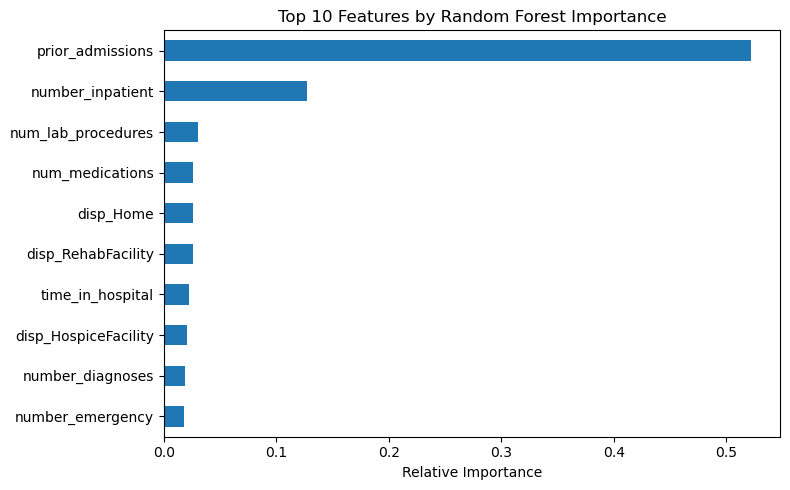

In [281]:
import matplotlib.pyplot as plt


# 1. Take the top 10 features
top10 = imp.nlargest(10)

# 2. Plot them horizontally
plt.figure(figsize=(8, 5))
top10[::-1].plot(kind='barh')  # reverse so the biggest is at the top
plt.title("Top 10 Features by Random Forest Importance")
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()


In [283]:
from sklearn.metrics import precision_recall_curve, classification_report

# 1. Compute precision, recall, and thresholds once
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

# 2. Choose your recall goal
target_recall = 0.75

# 3. Build a simple table of metrics for each threshold
rows = []
for p, r, t in zip(precisions[:-1], recalls[:-1], thresholds):
    # Compute F1 for clarity
    if p + r == 0:
        f1 = 0
    else:
        f1 = 2 * p * r / (p + r)
    rows.append({'threshold': t, 'precision': p, 'recall': r, 'f1': f1})

import pandas as pd
df_metrics = pd.DataFrame(rows)

# 4. Filter to thresholds that meet or exceed your recall goal
df_good = df_metrics[df_metrics['recall'] >= target_recall]

# 5. Pick the one with the highest precision
best_row = df_good.loc[df_good['precision'].idxmax()]

chosen_thresh = best_row['threshold']
print(f"Chosen threshold for ≥{target_recall*100:.0f}% recall: {chosen_thresh:.3f}")
print(best_row)

# 6. Apply that threshold to get final predictions and report
y_pred = (y_scores >= chosen_thresh).astype(int)
print("\nFinal classification report:")
print(classification_report(y_test, y_pred, digits=3))


Chosen threshold for ≥75% recall: 0.512
threshold    0.511721
precision    0.230665
recall       0.751211
f1           0.352953
Name: 12953, dtype: float64

Final classification report:
              precision    recall  f1-score   support

           0      0.956     0.685     0.798     18083
           1      0.231     0.751     0.353      2271

    accuracy                          0.693     20354
   macro avg      0.594     0.718     0.576     20354
weighted avg      0.875     0.693     0.749     20354

